# One Mean

Consider a dataset about $N = 54$ cars sampled from the year $1993$.  Of interest is the (unknown population) mean miles per gallon, $\mu$.  We assume 

$$Y_1, \ldots, Y_N \sim_{iid} \text{Normal}(\mu, \sigma^2) \\ \mathbb{E}(Y) = \mu.$$

The parameter $\sigma$ might be of interest to some, but not us now.  By choosing this model we are implicitly assuming that $\mathbb{E}(Y) = \mu$, where $\mu$ is a constant function that does not depend on any other characteristics about the population of cars from $1993$.  

Assuming the mean $\mu$ is constant is an unrealistic assumption if you think too long about this problem.  Nevertheless, this is a common assumption because of its simplicity.  In situations where simplicity is what you want, assuming the mean $\mu$ is constant across all cars from $1993$ is fine.  On the other hand, such simplicity is not always desired.  More complex models that relate mean miles per gallon to, say, weight or the drivetrain type are explored in the following sections of this chapter.

The following code reads in the dataset, plots the $\texttt{mpgCity}$ data, and calculates an estimate of the population mean, $\hat{\mu}$ based on the observed MPG for each car.

In [1]:
library(ggplot2)
cars <- read.csv("https://raw.githubusercontent.com/roualdes/data/master/cars.csv")

In [2]:
update_geom_defaults("point", list(colour = "blue"))
update_geom_defaults("density", list(colour = "blue"))
update_geom_defaults("path", list(colour = "blue"))
old <- theme_set(theme_bw() + theme(text = element_text(size=18)))

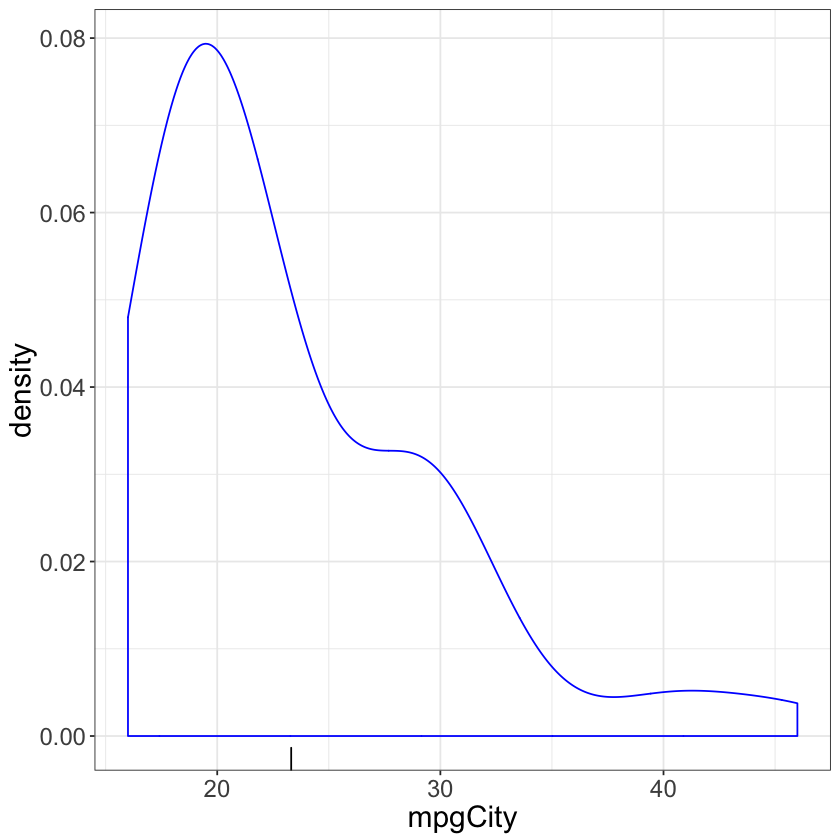

In [3]:
# -1 * simplified log-likelihood for normal model
ll <- function(mu, y) {
    sum((y - mu)^2)
}
mu_hat <- optim(rexp(1), ll, method="L-BFGS-B", y=cars$mpgCity)$par

ggplot() + 
    geom_density(data=cars, aes(mpgCity)) +
    geom_rug(data=data.frame(mu=mu_hat), aes(mu))

The estimate $\hat{\mu}$ is our best guess of the population mean city MPG for cars from $1993$.  What we don't yet have is any measure of uncertainty surrounding this best guess.  Though this number seems reasonable, it's possible this number could have shown up by pure chance.  We'll next produce a confidence interval for the true population mean city MPG for cars from $1993$.  

The following code uses the library $\texttt{boot}$ to perform the random sampling (uniformly and with replacement) from the original data.  The same strategy that's discussed in Chapter Bootstrap is used here.  Sampling will happen over the indices of our original data.  The function $\texttt{boot::boot}$ requires that we write a function that takes two arguments, the data to calculate our statistic of interest on and a vector of indices.  

In [4]:
library(boot)

sample_mean <- function(data, idx) {
    optim(rexp(1), ll, method="L-BFGS-B", x=data[idx])$par
}

b <- boot(cars$mpgCity, R=999, sample_mean)
(bci <- boot.ci(b, conf=.9, type="perc"))

ERROR: Error in fn(par, ...): unused argument (x = data[idx])


The standard conclusion from this goes as follows.  We are $90\%$ confident that the true population mean city MPG for cars from $1993$ is between $21.9$ and $24.8$.

Notice though this confidence interval carries with it a number of assumptions.  The same assumption from before is carried forward, that the true population mean does not vary by any other population characteristics.  Further, the bounds of the confidence interval are randomly produced.  If you re-run the code above, you'll likely get slightly different numbers.  So don't get too carried away with carrying decimal places, $2$ is a good general policy.

In [ ]:
ggplot() + 
    geom_density(data=cars, aes(mpgCity)) +
    geom_rug(data=data.frame(ci=c(mu_hat, bci$percent[4:5]), bounds=c(F, T, T)), aes(ci, color=bounds)) +
    guides(color=FALSE)

When interpreting the estimated mean, and the lower and upper bound of the confidence interval, it's important to remember that these statistics are referring to the population mean, not specific data points.  Specifically, it is **not** the case that $90\%$ of all observed data (within this sample nor any future sample) will fall within this interval.  

A strict interpretation of this interval says that $90\%$ of an infinite collection of confidence intervals, calculated by and your infinite number of friends, will contain the true population mean.  That is $90\%$ of these (hypothetical) confidence intervals will capture the true population mean.  This indeed suggests that $10\%$ of the hypothetical confidence intervals will not capture the true population mean.

This subtle difference highlights the difference between estimating a population mean, for which it is reasonable to assume a Normal distribution, and fitting a distribution (via its parameters) to a dataset.